In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import joblib


In [2]:
df = pd.read_csv("../data/transactions.csv")
print(df.shape)
df.head()


(200000, 24)


,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


In [3]:
use_cols = [
    "Transaction_Amount",
    "Account_Balance",
    "Age",
    "Transaction_Type",
    "Merchant_Category",
    "Transaction_Device"
]

df = df[use_cols]
df.head()


,Transaction_Amount,Account_Balance,Age,Transaction_Type,Merchant_Category,Transaction_Device
0,32415.45,74557.27,60,Transfer,Restaurant,Voice Assistant
1,43622.60,74622.66,51,Bill Payment,Restaurant,POS Mobile Device
2,63062.56,66817.99,20,Bill Payment,Groceries,ATM
3,14000.72,58177.08,57,Debit,Entertainment,POS Mobile App
4,18335.16,16108.56,43,Transfer,Entertainment,Virtual Card


In [4]:
# Numeric → median
num_cols = df.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Categorical → mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


C:\Users\Dell\AppData\Local\Temp\ipykernel_15760\3636299429.py:4: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_15760\3636299429.py:4: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment usi

In [5]:
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df.head()


,Transaction_Amount,Account_Balance,Age,Transaction_Type,Merchant_Category,Transaction_Device
0,32415.45,74557.27,60,3,5,17
1,43622.60,74622.66,51,0,5,9
2,63062.56,66817.99,20,0,3,0
3,14000.72,58177.08,57,2,2,8
4,18335.16,16108.56,43,3,2,16


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)



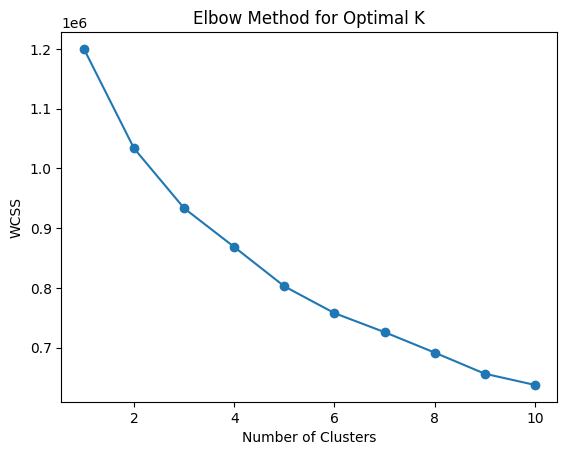

In [8]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()


In [10]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df["Cluster"] = clusters
df.head()



,Transaction_Amount,Account_Balance,Age,Transaction_Type,Merchant_Category,Transaction_Device,Cluster
0,32415.45,74557.27,60,3,5,17,2
1,43622.60,74622.66,51,0,5,9,2
2,63062.56,66817.99,20,0,3,0,2
3,14000.72,58177.08,57,2,2,8,2
4,18335.16,16108.56,43,3,2,16,0


In [ ]:
df.groupby("Cluster").mean()
##High Transaction_Amount
#Low Account_Balance
#Unusual patterns
#= potential fraud cluster.


,Transaction_Amount,Account_Balance,Age,Transaction_Type,Merchant_Category,Transaction_Device
Cluster,,,,,,
0,49444.280366,27023.208233,44.244585,1.442952,2.485507,10.706641
1,50167.580423,53557.556700,43.778826,3.418865,2.523945,3.234790
2,49109.118468,77461.030578,43.977648,1.375796,2.493549,10.824484


In [12]:
joblib.dump(kmeans, "../models/fraud_cluster.pkl")
joblib.dump(scaler, "../models/fraud_scaler.pkl")

print("Fraud detection model saved.")


Fraud detection model saved.


In [13]:
sample_txn = df.drop("Cluster", axis=1).iloc[[0]]
sample_scaled = scaler.transform(sample_txn)

cluster_pred = kmeans.predict(sample_scaled)
print("Transaction belongs to cluster:", cluster_pred[0])


Transaction belongs to cluster: 2


In [16]:
SUSPICIOUS_CLUSTER = 2

def fraud_decision(cluster_id):
    if cluster_id == SUSPICIOUS_CLUSTER:
        return "🚨 FRAUD ALERT"
    else:
        return "✅ NORMAL TRANSACTION"


In [17]:
sample_txn = df.drop("Cluster", axis=1).iloc[[0]]
sample_scaled = scaler.transform(sample_txn)

cluster_pred = kmeans.predict(sample_scaled)[0]

decision = fraud_decision(cluster_pred)

print("Cluster:", cluster_pred)
print("Decision:", decision)


Cluster: 2
Decision: 🚨 FRAUD ALERT
